In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.interpolate import UnivariateSpline

In [87]:
def percentile_summary(df, column_name="x"):
  percentiles = [0.2, 0.4, 0.6, 0.8]
  for p in percentiles:
    threshold = df[column_name].quantile(p)
    count = df[column_name][df[column_name] > threshold].count()
    pct = f"{count / len(df) * 100:.1f}%"
    print(f"x>{threshold:.0f} = {pct}")

def detectandDropOutliers(df, numerical_column):
  for column in numerical_column:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * IQR
    upper_bound = df[column].quantile(0.75) + 1.5 * IQR
    outlier_count = (df[column] < lower_bound).sum() + (df[column] > upper_bound).sum()
    print(f"Outliers in column {column}: {outlier_count}\n")
    df = df[df[column] < upper_bound]

  return df

In [88]:
Cab_Data = pd.read_csv('Cab_Data.csv')
City = pd.read_csv('City.csv')
Customer_ID = pd.read_csv('Customer_ID.csv')
Transaction_ID = pd.read_csv('Transaction_ID.csv')

In [89]:
print("Transaction_ID")
print("\nhead")
print(Transaction_ID.head())
print("\nshape")
print(Transaction_ID.shape)
print("\ninfo")
print(Transaction_ID.info())
print("\ndescribe")
print(Transaction_ID.describe())
print("\nisnull sum")
print(Transaction_ID.isnull().sum())
print("\nduplicated sum")
print(Transaction_ID.duplicated().sum())

#Transaction ID specific analysis
#no need for outlier detection
print("\n\nTransaction ID specific analysis")
print(Transaction_ID['Payment_Mode'].value_counts(normalize=True))


Transaction_ID

head
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

shape
(440098, 3)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None

describe
       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.

In [90]:
print("\n\nCab_Data")
print("head")
print(Cab_Data.head())
print("\nshape")
print(Cab_Data.shape)
print("\ninfo")
print(Cab_Data.info())
print("\ndescribe")
print(Cab_Data.describe())
print("\nisnull sum")
print(Cab_Data.isnull().sum())
print("\nduplicated sum")
print(Cab_Data.duplicated().sum())

# number to date using (datetime.date(1900, 1, 1) + datetime.timedelta(days=43102)) for each row in Date of Travel
Cab_Data['Date of Travel'] = Cab_Data['Date of Travel'].apply(lambda x: (datetime.date(1900, 1, 1) + datetime.timedelta(days=x)).strftime("%d-%m-%Y"))


# Creating seperate DataFrames for pink and yellow cab rows
yellow_cab_data = Cab_Data[Cab_Data["Company"] == "Yellow Cab"]
pink_cab_data = Cab_Data[Cab_Data["Company"] == "Pink Cab"]



print("\noutliers")
yellow_cab_data['Price_per_KM'] = yellow_cab_data["Price Charged"] / yellow_cab_data['KM Travelled']
pink_cab_data['Price_per_KM'] = pink_cab_data["Price Charged"] / pink_cab_data['KM Travelled']
yellow_cab_data = detectandDropOutliers(yellow_cab_data, ["Price_per_KM"])
pink_cab_data = detectandDropOutliers(pink_cab_data, ["Price_per_KM"])
yellow_cab_data['Profit_per_KM'] = (yellow_cab_data["Price Charged"] - yellow_cab_data['Cost of Trip']) / yellow_cab_data['KM Travelled']
pink_cab_data['Profit_per_KM'] = (pink_cab_data["Price Charged"] - pink_cab_data['Cost of Trip']) / pink_cab_data['KM Travelled']


# Cab Data specific analysis
print("\n\nPink Cab")
print("\nPrice per KM average")
print(pink_cab_data['Price_per_KM'].mean)
print("\nCity demand")
print(pink_cab_data['City'].value_counts(normalize=True))
print("\nKM travelled Percentile")
percentile_summary(pink_cab_data, "KM Travelled")
print("\nCost of Trip Percentile")
percentile_summary(pink_cab_data, "Cost of Trip")
print("\nPrice Charged Percentile")
percentile_summary(pink_cab_data, "Price Charged")
print("\nProfit Percentile")
pink_cab_data['Profit'] = pink_cab_data['Price Charged'] - pink_cab_data['Cost of Trip']
percentile_summary(pink_cab_data, "Profit")

print("\n\nyellow Cab")
print("\nPrice per KM average")
print(yellow_cab_data['Price_per_KM'].mean)
print("\nCity demand")
print(yellow_cab_data['City'].value_counts(normalize=True))
print("\nKM travelled Percentile")
percentile_summary(yellow_cab_data, "KM Travelled")
print("\nCost of Trip Percentile")
percentile_summary(yellow_cab_data, "Cost of Trip")
print("\nPrice Charged Percentile")
percentile_summary(yellow_cab_data, "Price Charged")
print("\nProfit Percentile")
yellow_cab_data['Profit'] = yellow_cab_data['Price Charged'] - yellow_cab_data['Cost of Trip']
percentile_summary(yellow_cab_data, "Profit")



Cab_Data
head
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

shape
(359392, 7)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7452\762154614.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cab_data['Price_per_KM'] = yellow_cab_data["Price Charged"] / yellow_cab_data['KM Travelled']
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7452\762154614.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cab_data['Price_per_KM'] = pink_cab_data["Price Charged"] / pink_cab_data['KM Travelled']


x>240 = 60.0%
x>350 = 40.0%
x>460 = 20.0%

Price Charged Percentile
x>187 = 80.0%
x>344 = 60.0%
x>502 = 40.0%
x>683 = 20.0%

Profit Percentile
x>27 = 80.0%
x>71 = 60.0%
x>139 = 40.0%
x>268 = 20.0%


In [91]:
datetime.date(1900, 1, 1) + datetime.timedelta(days=43102)


datetime.date(2018, 1, 4)

In [92]:
print("\n\nCity")
print("head")
print(City.head())
print("\nshape")
print(City.shape)
print("\ninfo")
print(City.info())
print("\ndescribe")
print(City.describe())
print("\nisnull sum")
print(City.isnull().sum())
print("\nduplicated sum")
print(City.duplicated().sum())

# City specific analysis
#Uncomment the next 2 lines in the first run only
City["Population"] = City["Population"].str.replace(",", "").astype(int)
City["Users"] = City["Users"].str.replace(",", "").astype(int)

City["Users per City percent"] = City['Users'] / City['Population']
City = City.sort_values(by = "Users per City percent" , ascending = False)
print(City[["City","Users per City percent"]])
# print("\n\nCity specific analysis")
# City["population"] = City["Population"].str.replace(",", "").astype(float)
# City["Population"] = City["population"].astype(int)
# print("\n\nPopulation Percentile")
# percentile_summary(City, "Population")
# print("\n\nUsers Percentile")
# City["Users"] = City["Users"].str.replace(",", "").astype(int)
# percentile_summary(City, "Users")



City
head
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 

shape
(20, 3)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
None

describe
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

isnull sum
City          0
Population    0
Users         0
dtype: int64

duplicated sum
0
                City  Users per City perce

In [93]:
print("\n\nCustomer_ID")
print("head")
print(Customer_ID.head())
print("\nshape")
print(Customer_ID.shape)
print("\ninfo")
print(Customer_ID.info())
print("\ndescribe")
print(Customer_ID.describe())
print("\nisnull sum")
print(Customer_ID.isnull().sum())
print("\nduplicated sum")
print(Customer_ID.duplicated().sum())

# Customer ID specific analysis
print("\n\nCustomer ID specific analysis")
print(Customer_ID['Gender'].value_counts(normalize=True))
print("\n\nAge Percentile")
percentile_summary(Customer_ID, "Age")
print("\n\nIncome Percentile")
percentile_summary(Customer_ID, "Income (USD/Month)")



Customer_ID
head
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

shape
(49171, 4)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

describe
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.20825



Useful Plots


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


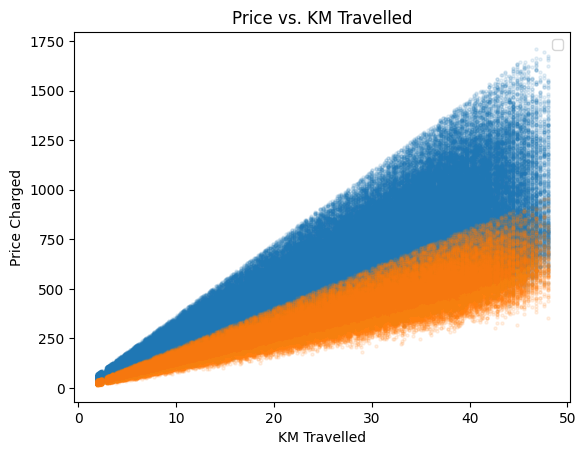

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


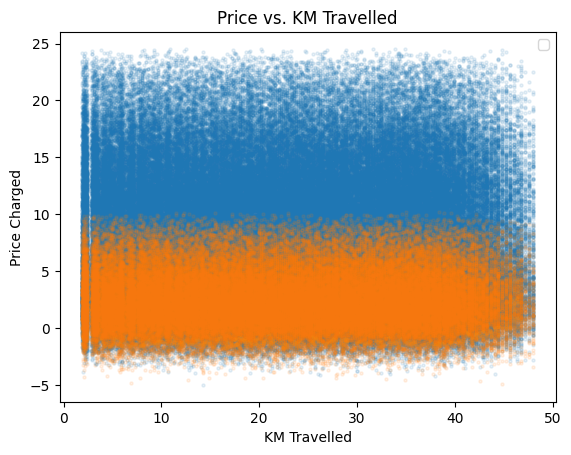

In [94]:
# Useful Plots
print("\n\nUseful Plots")
#1.1 Price vs. KM Travelled:
plt.scatter(yellow_cab_data["KM Travelled"], yellow_cab_data["Price Charged"], s = 5, alpha = .1)
plt.scatter(pink_cab_data["KM Travelled"], pink_cab_data["Price Charged"], s = 5, alpha = .1)
plt.xlabel("KM Travelled")
plt.ylabel("Price Charged")
plt.legend()
plt.title("Price vs. KM Travelled")
plt.show()

#1.2 profit per KM
plt.scatter(yellow_cab_data["KM Travelled"], yellow_cab_data["Profit_per_KM"], s = 5, alpha = .1)
plt.scatter(pink_cab_data["KM Travelled"], pink_cab_data["Profit_per_KM"], s = 5, alpha = .1)
plt.xlabel("KM Travelled")
plt.ylabel("Price Charged")
plt.legend()
plt.title("Price vs. KM Travelled")
plt.show()

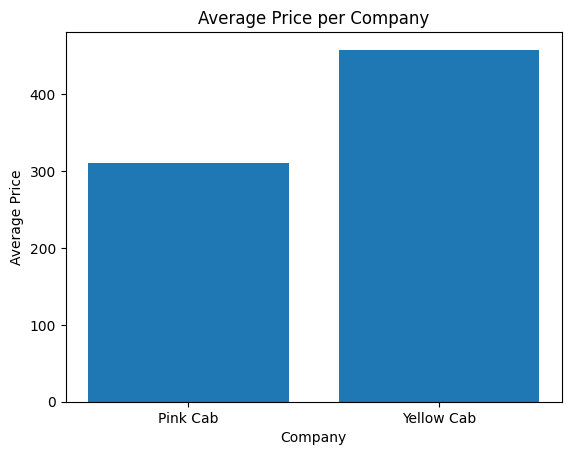

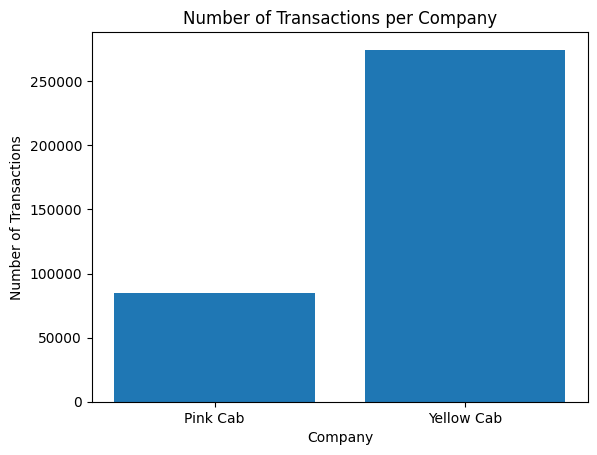

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


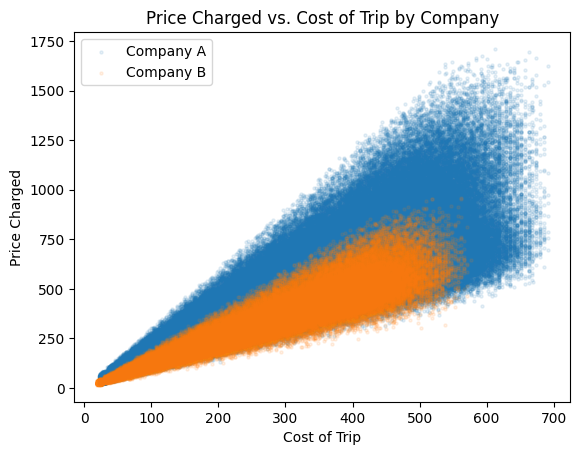

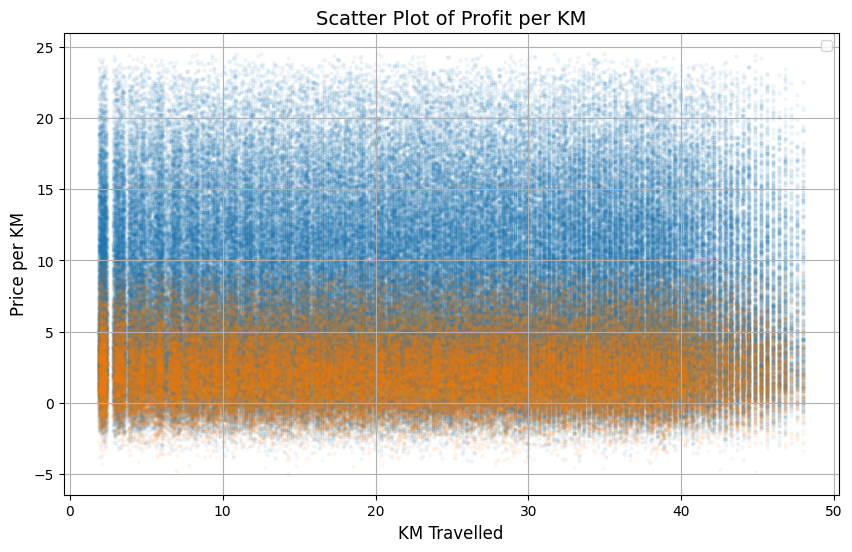

In [95]:
#2.1 average Price for each company:
avg_price_per_company = Cab_Data.groupby("Company")["Price Charged"].mean()
num_transactions_per_company = Cab_Data.groupby("Company")["Transaction ID"].count()

plt.bar(avg_price_per_company.index, avg_price_per_company.values)
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.title("Average Price per Company")
plt.show()

#2.2 number of transactions per company
plt.bar(num_transactions_per_company.index, num_transactions_per_company.values)
plt.xlabel("Company")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions per Company")
plt.show()

#2.3 price charged vs KM travelled
yellow_cab_data = yellow_cab_data.sort_values(by="Cost of Trip")
pink_cab_data = pink_cab_data.sort_values(by="Cost of Trip")

# Create the polyline plot
plt.scatter(yellow_cab_data["Cost of Trip"], yellow_cab_data["Price Charged"], label="Company A", s = 5, alpha = .1)
plt.scatter(pink_cab_data["Cost of Trip"], pink_cab_data["Price Charged"], label="Company B", s = 5, alpha = .1)


# Customize the plot
plt.xlabel("Cost of Trip")
plt.ylabel("Price Charged")
plt.title("Price Charged vs. Cost of Trip by Company")
plt.legend()

#2.4 Profit per KM travelled
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter( x = yellow_cab_data["KM Travelled"] ,y = yellow_cab_data["Profit_per_KM"], s = 5, alpha = .05)
plt.scatter( x = pink_cab_data["KM Travelled"] ,y = pink_cab_data["Profit_per_KM"], s = 5, alpha = .05)

# Customize plot elements
plt.xlabel("KM Travelled", fontsize=12)
plt.ylabel("Price per KM", fontsize=12)
plt.title("Scatter Plot of Profit per KM", fontsize=14)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

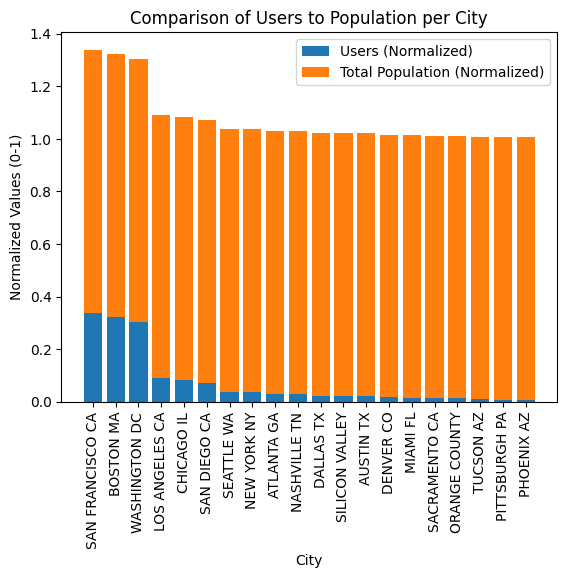

In [96]:
#3. City Demand:
# City.plot(x="City", y=["Users", "Population"], kind="bar", figsize=(10, 10), stacked=True)
plt.bar(City["City"], City["Users"] / City["Population"], label="Users (Normalized)")
plt.bar(City["City"], 1, bottom=City["Users"] / City["Population"], label="Total Population (Normalized)")
# Customize
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Normalized Values (0-1)")
plt.title("Comparison of Users to Population per City")
plt.legend()
plt.show()



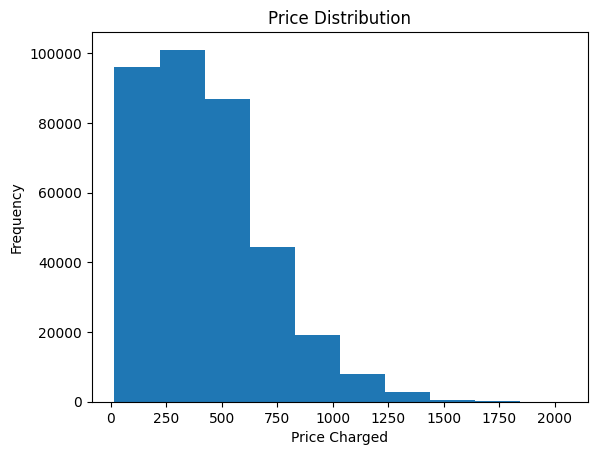

In [97]:
#4. Price Distribution:
plt.hist(Cab_Data["Price Charged"])
plt.xlabel("Price Charged")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

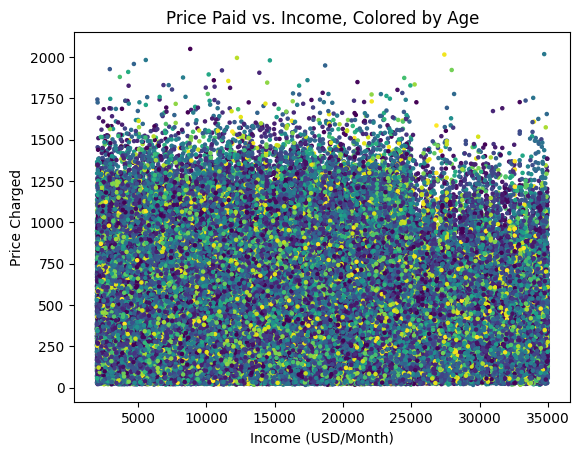

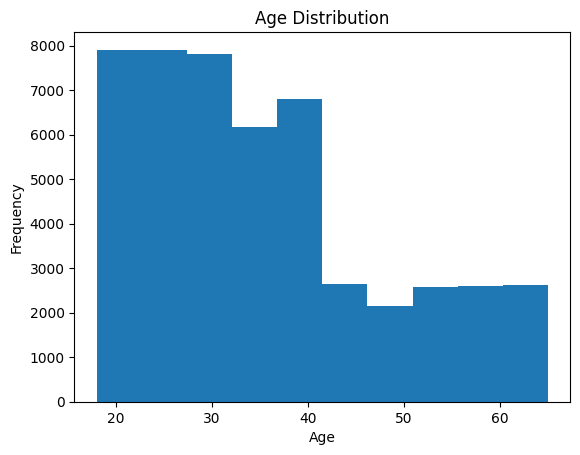

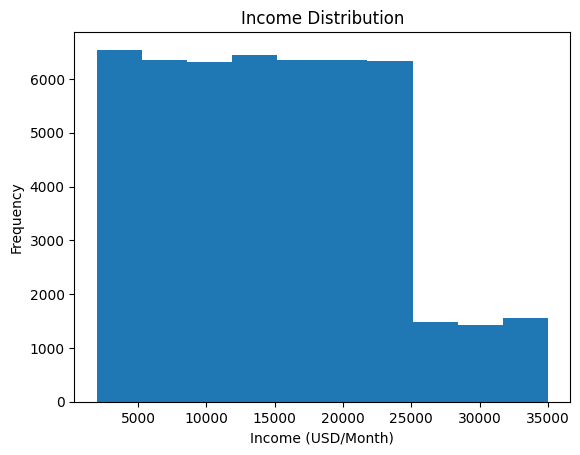

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7452\355878834.py:26: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  yellow_cab_data["Year"] = pd.to_datetime(yellow_cab_data["Date of Travel"]).dt.year
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7452\355878834.py:28: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pink_cab_data["Year"] = pd.to_datetime(pink_cab_data["Date of Travel"]).dt.year


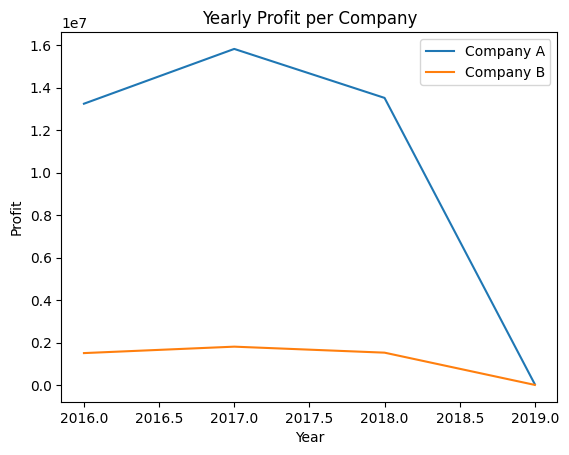

In [99]:
#5. Customer Segmentation Analysis
merged_data = Cab_Data.merge(Transaction_ID, on="Transaction ID")
merged_data = merged_data.merge(Customer_ID, on= "Customer ID")

plt.scatter(merged_data["Income (USD/Month)"], merged_data["Price Charged"], c=merged_data["Age"], s = 5, label = "Age")
plt.xlabel("Income (USD/Month)")
plt.ylabel("Price Charged")
plt.title("Price Paid vs. Income, Colored by Age")
plt.show()

#5.1 Age
plt.hist(Customer_ID["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()
#5.2 Income
plt.hist(Customer_ID["Income (USD/Month)"])
plt.xlabel("Income (USD/Month)")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()

#5.3 yearly profit plot for each company
# Create a new column for year in the yellow_cab_data DataFrame
yellow_cab_data["Year"] = pd.to_datetime(yellow_cab_data["Date of Travel"]).dt.year
# Create a new column for year in the pink_cab_data DataFrame
pink_cab_data["Year"] = pd.to_datetime(pink_cab_data["Date of Travel"]).dt.year
# plot yearly profit for each company
plt.plot(yellow_cab_data.groupby("Year")["Profit"].sum(), label="Company A")
plt.plot(pink_cab_data.groupby("Year")["Profit"].sum(), label="Company B")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Yearly Profit per Company")
plt.legend()
plt.show()